# Pymaceuticals Inc.
---

### Analysis

- Based on the correlation and regression analysis, we can see that there is a fairly strong positive relationship between the mouse weight and the average observed tumor volume. This is proved by the chart, as well as the correlation of 0.84. 
   Using the box plot analysis, we can also see how the final tumor volume was higher for the Infubinol and the Ceftamin treatments. Allowing us to conclude that Capomulin, and Ramicane treatments had a better chance of lowering the tumor volume. 
 

In [184]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata,study_results,how="left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].nunique()
mice_count

249

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data.duplicated(subset = ["Mouse ID","Timepoint"])
duplicate = combined_data.loc[duplicate,"Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = ~combined_data["Mouse ID"].isin(duplicate)
cleaned_data_df = combined_data[cleaned_data_df]
cleaned_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [42]:
# Checking the number of mice in the clean DataFrame.
mice_number_clean = cleaned_data_df["Mouse ID"].nunique()
mice_number_clean

248

## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# groupby
grouped_data = cleaned_data_df["Tumor Volume (mm3)"].groupby(cleaned_data_df["Drug Regimen"])
# statistics
mean = grouped_data.mean()
median = grouped_data.median()
variance = grouped_data.var()
standard_dev = grouped_data.std()
SEM = grouped_data.sem()
# Summary data frame
summary = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median,
                        "Tumor Volume Variance":variance, "Tumor Volume Std. Dev.":standard_dev,
                          "Tumor Volume Std. Err.":SEM})
summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_method = cleaned_data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
aggregation_method

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

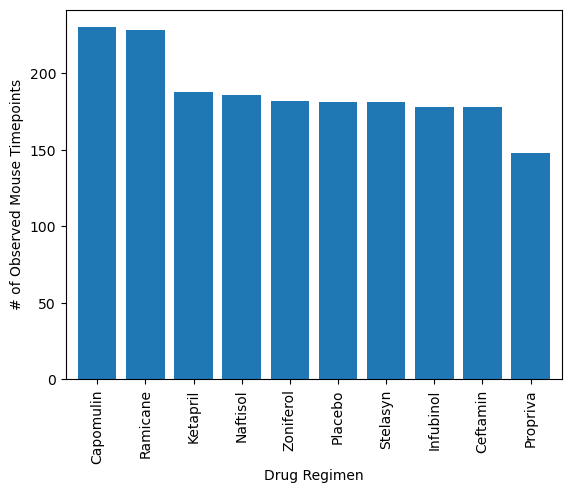

In [94]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot = cleaned_data_df["Drug Regimen"].value_counts().plot.bar(width=0.8)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")

<BarContainer object of 10 artists>

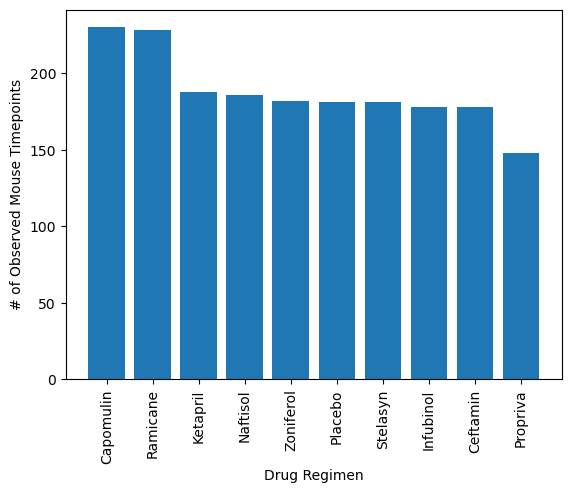

In [93]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = cleaned_data_df["Drug Regimen"].value_counts().index.values
y_axis = cleaned_data_df["Drug Regimen"].value_counts().values
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(x_axis,y_axis)

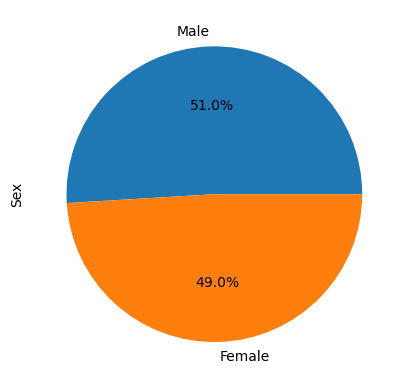

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie = cleaned_data_df["Sex"].value_counts().plot.pie(autopct="%1.1f%%")

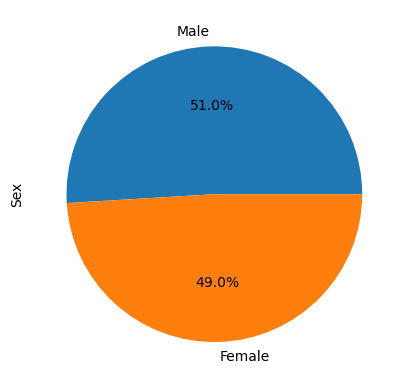

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mylabels = ["Male", "Female"]
plt.pie(cleaned_data_df["Sex"].value_counts(),labels=mylabels,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [160]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
capomulin_treat=cleaned_data_df.loc[cleaned_data_df["Drug Regimen"]=="Capomulin"]
great_Capomuin=capomulin_treat.groupby("Mouse ID").max()["Timepoint"]

ramicane_treat=cleaned_data_df.loc[cleaned_data_df["Drug Regimen"]=="Ramicane"]
great_ramicane=ramicane_treat.groupby("Mouse ID").max()["Timepoint"]

infubinol_treat=cleaned_data_df.loc[cleaned_data_df["Drug Regimen"]=="Infubinol"]
great_infubinol=infubinol_treat.groupby("Mouse ID").max()["Timepoint"]

ceftamin_treat=cleaned_data_df.loc[cleaned_data_df["Drug Regimen"]=="Ceftamin"]
great_ceftamin=ceftamin_treat.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last 
tumor_vol_cap = pd.DataFrame(great_Capomuin)
merge_cap = pd.merge(tumor_vol_cap,cleaned_data_df, on = ("Mouse ID","Timepoint"))
last_capomullin = merge_cap["Tumor Volume (mm3)"]

tumor_vol_ram = pd.DataFrame(great_ramicane)
merge_ram = pd.merge(tumor_vol_ram,cleaned_data_df, on = ("Mouse ID","Timepoint"))
last_ramicane = merge_ram["Tumor Volume (mm3)"]

tumor_vol_inf = pd.DataFrame(great_infubinol)
merge_inf = pd.merge(tumor_vol_inf,cleaned_data_df, on = ("Mouse ID","Timepoint"))
last_infubinol = merge_inf["Tumor Volume (mm3)"]

tumor_vol_ceft = pd.DataFrame(great_ceftamin)
merge_ceft = pd.merge(tumor_vol_ceft,cleaned_data_df, on = ("Mouse ID","Timepoint"))
last_ceftamin = merge_ceft["Tumor Volume (mm3)"]

In [222]:
# Put treatments into a list for for loop (and later for plot labels)
last_tumor_vol = [last_capomullin,last_ramicane,last_infubinol,last_ceftamin]  
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
x = [0,1,2,3]
for x in x:
    quartiles = last_tumor_vol[x].quantile([.25,.50,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

# Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{x}'s potential outliers:", lower_bound,upper_bound)

0's potential outliers: 20.70456164999999 51.83201549
1's potential outliers: 17.912664470000003 54.30681135
2's potential outliers: 36.83290494999999 82.74144559000001
3's potential outliers: 25.355449580000002 87.66645829999999


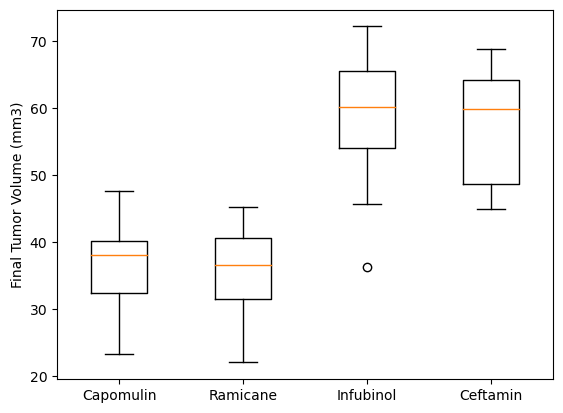

In [193]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
last_tumor_vol = [last_capomullin,last_ramicane,last_infubinol,last_ceftamin]
labels = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(last_tumor_vol, labels=labels)
plt.show()
    

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

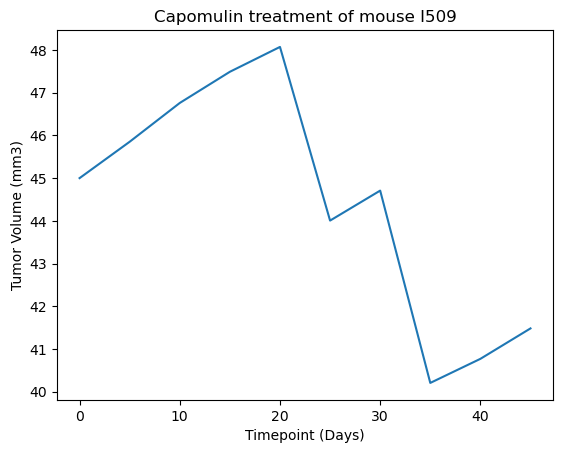

In [165]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df = capomulin_treat.loc[capomulin_treat["Mouse ID"] == "l509",:]
df.head()
x =df["Timepoint"]
size =df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.title("Capomulin treatment of mouse I509")
plt.plot(x,size)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')



   

/var/folders/9f/91d572116cn6ywy5mkwyt8br0000gn/T/ipykernel_87135/3046647231.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vol_mean = capomulin_treat.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

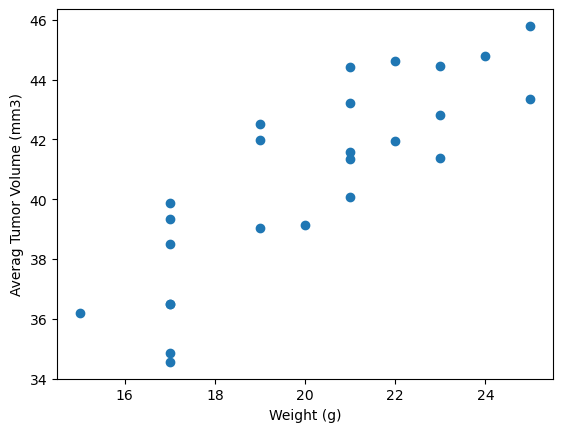

In [172]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
vol_mean = capomulin_treat.groupby(['Mouse ID']).mean()
plt.scatter(vol_mean['Weight (g)'],vol_mean['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel('Averag Tumor Volume (mm3)')


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


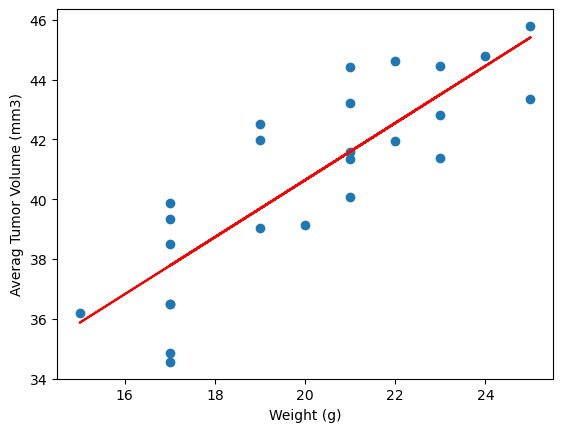

In [190]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coeff = st.pearsonr(vol_mean['Weight (g)'],vol_mean['Tumor Volume (mm3)']) 
print(f'The correlation between mouse weight and the average tumor volume is {round(corr_coeff[0],2)}')
# add line
regress = vol_mean["Weight (g)"]* slope + intercept
plt.scatter(vol_mean['Weight (g)'],vol_mean['Tumor Volume (mm3)'])
plt.plot(vol_mean["Weight (g)"],regress, color='red')
plt.xlabel("Weight (g)")
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show()
